ID - 
Age, 
Gender, 
PackHistory - smoking 20 cigarates a day in a year, 
COPD Severity - mild, moderate, severe, very severe, 
MWT1 - Distance that patient walks in 6 minutes in meters, 
MWT2, 
MWTBest, 
FEV1 - forced expiratory volume in one second - Measure of lung function, 
FEV1PRED - perc of patient's actual results compared to predicted normal, 
FEC - forced vital capacity- Measure of lung function , 
FECPRED, 
CAT - Range of CAT scores from 0–40. Higher scores denote a more severe impact of COPD,
SGRQ - Quality of life index. Lower the value, higher the quality of life,
Age in quartiles,
COPD severity  in numbers,
gender in numbers, 
smoking in numbers, 
Diabetes, 
Muscular pain, 
Hypertension, 
Atrial Fib, 
IHD -- Ischemic Heart Disease 


Problem:  With this data, we will find out that the patient has COPD or not. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
path = "/content/drive/MyDrive/Colab Notebooks/copdDataSet_modified.csv"



In [74]:
data = pd.read_csv(path)

In [75]:
data.head(10)

,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,2.40,98,25,69.55,4,3,1,2,1,0,0,1,0
1,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,1.64,65,12,44.24,4,2,0,2,1,0,0,1,1
2,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,2.30,86,22,44.09,4,2,0,2,1,0,0,1,0
3,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,1.14,27,28,62.04,1,4,1,2,0,0,1,1,0
4,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,2.91,98,32,75.56,1,3,1,2,0,1,1,0,0
5,84,67,26.0,MODERATE,216.0,180.0,216.0,1.09,50.0,1.99,60,29,73.82,2,2,0,1,1,0,0,1,0
6,93,67,50.0,SEVERE,214.0,237.0,237.0,0.69,35.0,1.31,48,29,77.44,2,3,0,1,1,0,0,1,0
7,27,83,90.0,SEVERE,214.0,237.0,237.0,0.68,32.0,2.23,77,22,45.41,4,3,1,2,1,0,0,1,0
8,114,72,50.0,MODERATE,231.0,237.0,237.0,2.13,63.0,4.38,80,25,69.61,3,2,1,1,1,0,0,1,0
9,152,75,6.0,SEVERE,226.0,240.0,240.0,1.06,46.0,2.06,75,31,55.56,3,3,0,2,0,1,0,0,0


I am going to drop serial no, ID, MWT1, MWT2, COPDSEVERITY(we have it in numbers).  I am going to see how both of these columns work, then decide FEV!PRED, FVCPRED

In [76]:
data.drop(['ID','MWT1','MWT2','COPDSEVERITY'], axis = 1, inplace=True)

In [77]:
data.head()


,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,75.56,1,3,1,2,0,1,1,0,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AGE           101 non-null    int64  
 1   PackHistory   101 non-null    float64
 2   MWT1Best      100 non-null    float64
 3   FEV1          101 non-null    float64
 4   FEV1PRED      101 non-null    float64
 5   FVC           101 non-null    float64
 6   FVCPRED       101 non-null    int64  
 7   CAT           101 non-null    int64  
 8   SGRQ          101 non-null    float64
 9   AGEquartiles  101 non-null    int64  
 10  copd          101 non-null    int64  
 11  gender        101 non-null    int64  
 12  smoking       101 non-null    int64  
 13  Diabetes      101 non-null    int64  
 14  muscular      101 non-null    int64  
 15  hypertension  101 non-null    int64  
 16  AtrialFib     101 non-null    int64  
 17  IHD           101 non-null    int64  
dtypes: float64(6), int64(12)
memor

In [79]:
data.shape

(101, 18)

In [80]:
data.describe()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,101.00000,101.000000,100.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.00000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,70.09901,39.698020,399.110000,1.603762,58.531485,2.954950,86.435644,19.336634,40.185842,2.475248,2.19802,0.643564,1.841584,0.207921,0.188119,0.118812,0.198020,0.089109
std,7.89874,24.558713,106.550116,0.672763,22.294821,0.976283,21.740016,18.674730,18.239268,1.109901,0.88340,0.481335,0.366952,0.407844,0.392756,0.325181,0.400495,0.286322
min,44.00000,1.000000,120.000000,0.450000,3.290000,1.140000,27.000000,3.000000,2.000000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.00000,20.000000,303.750000,1.100000,42.000000,2.270000,71.000000,12.000000,28.410000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,71.00000,36.000000,420.000000,1.600000,60.000000,2.770000,84.000000,18.000000,38.210000,3.000000,2.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.00000,54.000000,465.250000,1.960000,75.000000,3.630000,103.000000,24.000000,55.230000,3.000000,3.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.00000,109.000000,699.000000,3.180000,102.000000,5.370000,132.000000,188.000000,77.440000,4.000000,4.00000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
data.isna().sum()   #There is one missing value

AGE             0
PackHistory     0
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [82]:
data[data['MWT1Best'].isnull()] 

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
100,78,55.0,NaN,1.15,54.0,2.01,85,18,30.21,4,2,1,2,0,0,0,0,0


In [83]:
# finding the mean of MWT1Best where copd level is 2 
meanMWT1Best = data.MWT1Best[data['copd']==2].mean()
meanMWT1Best

407.0

In [84]:
#Since this belongs to COPD severity level 2, we can group the level 2, and find the mean and replace that value to the missing value

meanMWT1Best = data.MWT1Best[data['copd']==2].mean()
data['MWT1Best'] = np.where(data['MWT1Best'].isnull(), meanMWT1Best, data.MWT1Best)


In [85]:
data.head(10)

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,77,60.0,120.0,1.21,36.0,2.40,98,25,69.55,4,3,1,2,1,0,0,1,0
1,79,50.0,176.0,1.09,56.0,1.64,65,12,44.24,4,2,0,2,1,0,0,1,1
2,80,11.0,201.0,1.52,68.0,2.30,86,22,44.09,4,2,0,2,1,0,0,1,0
3,56,60.0,210.0,0.47,14.0,1.14,27,28,62.04,1,4,1,2,0,0,1,1,0
4,65,68.0,210.0,1.07,42.0,2.91,98,32,75.56,1,3,1,2,0,1,1,0,0
5,67,26.0,216.0,1.09,50.0,1.99,60,29,73.82,2,2,0,1,1,0,0,1,0
6,67,50.0,237.0,0.69,35.0,1.31,48,29,77.44,2,3,0,1,1,0,0,1,0
7,83,90.0,237.0,0.68,32.0,2.23,77,22,45.41,4,3,1,2,1,0,0,1,0
8,72,50.0,237.0,2.13,63.0,4.38,80,25,69.61,3,2,1,1,1,0,0,1,0
9,75,6.0,240.0,1.06,46.0,2.06,75,31,55.56,3,3,0,2,0,1,0,0,0


In [86]:
# Successfully replaced the NAN value with an appropriate mean value 
data.tail()

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
96,68,25.0,575.0,2.70,98.0,3.87,108,20,35.84,2,1,1,2,0,1,0,0,0
97,75,40.0,577.0,2.90,93.0,4.72,114,9,15.05,3,1,1,2,0,1,0,0,1
98,68,30.0,582.0,1.65,67.0,2.80,88,4,19.70,2,2,0,2,0,0,1,0,0
99,54,30.0,699.0,1.72,44.0,4.07,82,10,20.55,1,3,1,2,0,0,0,0,0
100,78,55.0,407.0,1.15,54.0,2.01,85,18,30.21,4,2,1,2,0,0,0,0,0


In [87]:
data.groupby(["copd"]).count()
# data is not equally spread.  

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
copd,,,,,,,,,,,,,,,,,
1,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
2,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
3,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


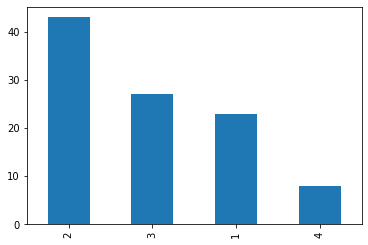

In [88]:
data['copd'].value_counts().plot(kind='bar')


In [89]:
data.corr()

#correlation table

,AGE,PackHistory,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
AGE,1.000000,-0.001546,-0.228177,-0.102122,0.067459,-0.145226,0.007783,0.083361,-0.139361,0.897985,-0.024335,0.159299,0.126220,0.136338,0.168002,-0.105851,0.066447,0.128710
PackHistory,-0.001546,1.000000,-0.251218,-0.131505,-0.131341,-0.093073,-0.004490,-0.143248,0.032126,0.010821,0.067314,0.021258,0.021270,0.042273,0.009059,-0.014245,0.223717,-0.016045
MWT1Best,-0.228177,-0.251218,1.000000,0.467620,0.390134,0.442857,0.259382,-0.154532,-0.533228,-0.213225,-0.417668,0.138304,0.025707,-0.364242,0.020756,0.027771,-0.527499,0.112107
FEV1,-0.102122,-0.131505,0.467620,1.000000,0.776110,0.820165,0.515856,-0.064804,-0.303407,-0.089200,-0.767522,0.312375,0.005679,-0.176360,0.125970,0.099870,-0.179457,0.104666
FEV1PRED,0.067459,-0.131341,0.390134,0.776110,1.000000,0.521530,0.625878,0.007506,-0.331795,0.004279,-0.865305,-0.052060,0.031174,-0.176811,0.142640,0.039480,-0.164218,0.124096
FVC,-0.145226,-0.093073,0.442857,0.820165,0.521530,1.000000,0.622430,-0.158859,-0.220090,-0.119674,-0.546803,0.403649,0.007515,-0.234672,0.045273,0.050102,-0.164171,0.070670
FVCPRED,0.007783,-0.004490,0.259382,0.515856,0.625878,0.622430,1.000000,-0.139014,-0.289177,-0.107716,-0.643428,-0.190475,0.129075,-0.260698,-0.003838,-0.042758,-0.131751,0.064388
CAT,0.083361,-0.143248,-0.154532,-0.064804,0.007506,-0.158859,-0.139014,1.000000,0.287782,0.127775,0.020165,0.051307,-0.027163,-0.006656,0.262596,-0.044527,-0.017024,-0.050551
SGRQ,-0.139361,0.032126,-0.533228,-0.303407,-0.331795,-0.220090,-0.289177,0.287782,1.000000,-0.078246,0.328044,-0.020890,-0.204016,0.242630,0.034674,0.023756,0.172810,0.027493
AGEquartiles,0.897985,0.010821,-0.213225,-0.089200,0.004279,-0.119674,-0.107716,0.127775,-0.078246,1.000000,0.025447,0.282814,0.063935,0.132985,0.159898,-0.213427,0.056130,0.148613


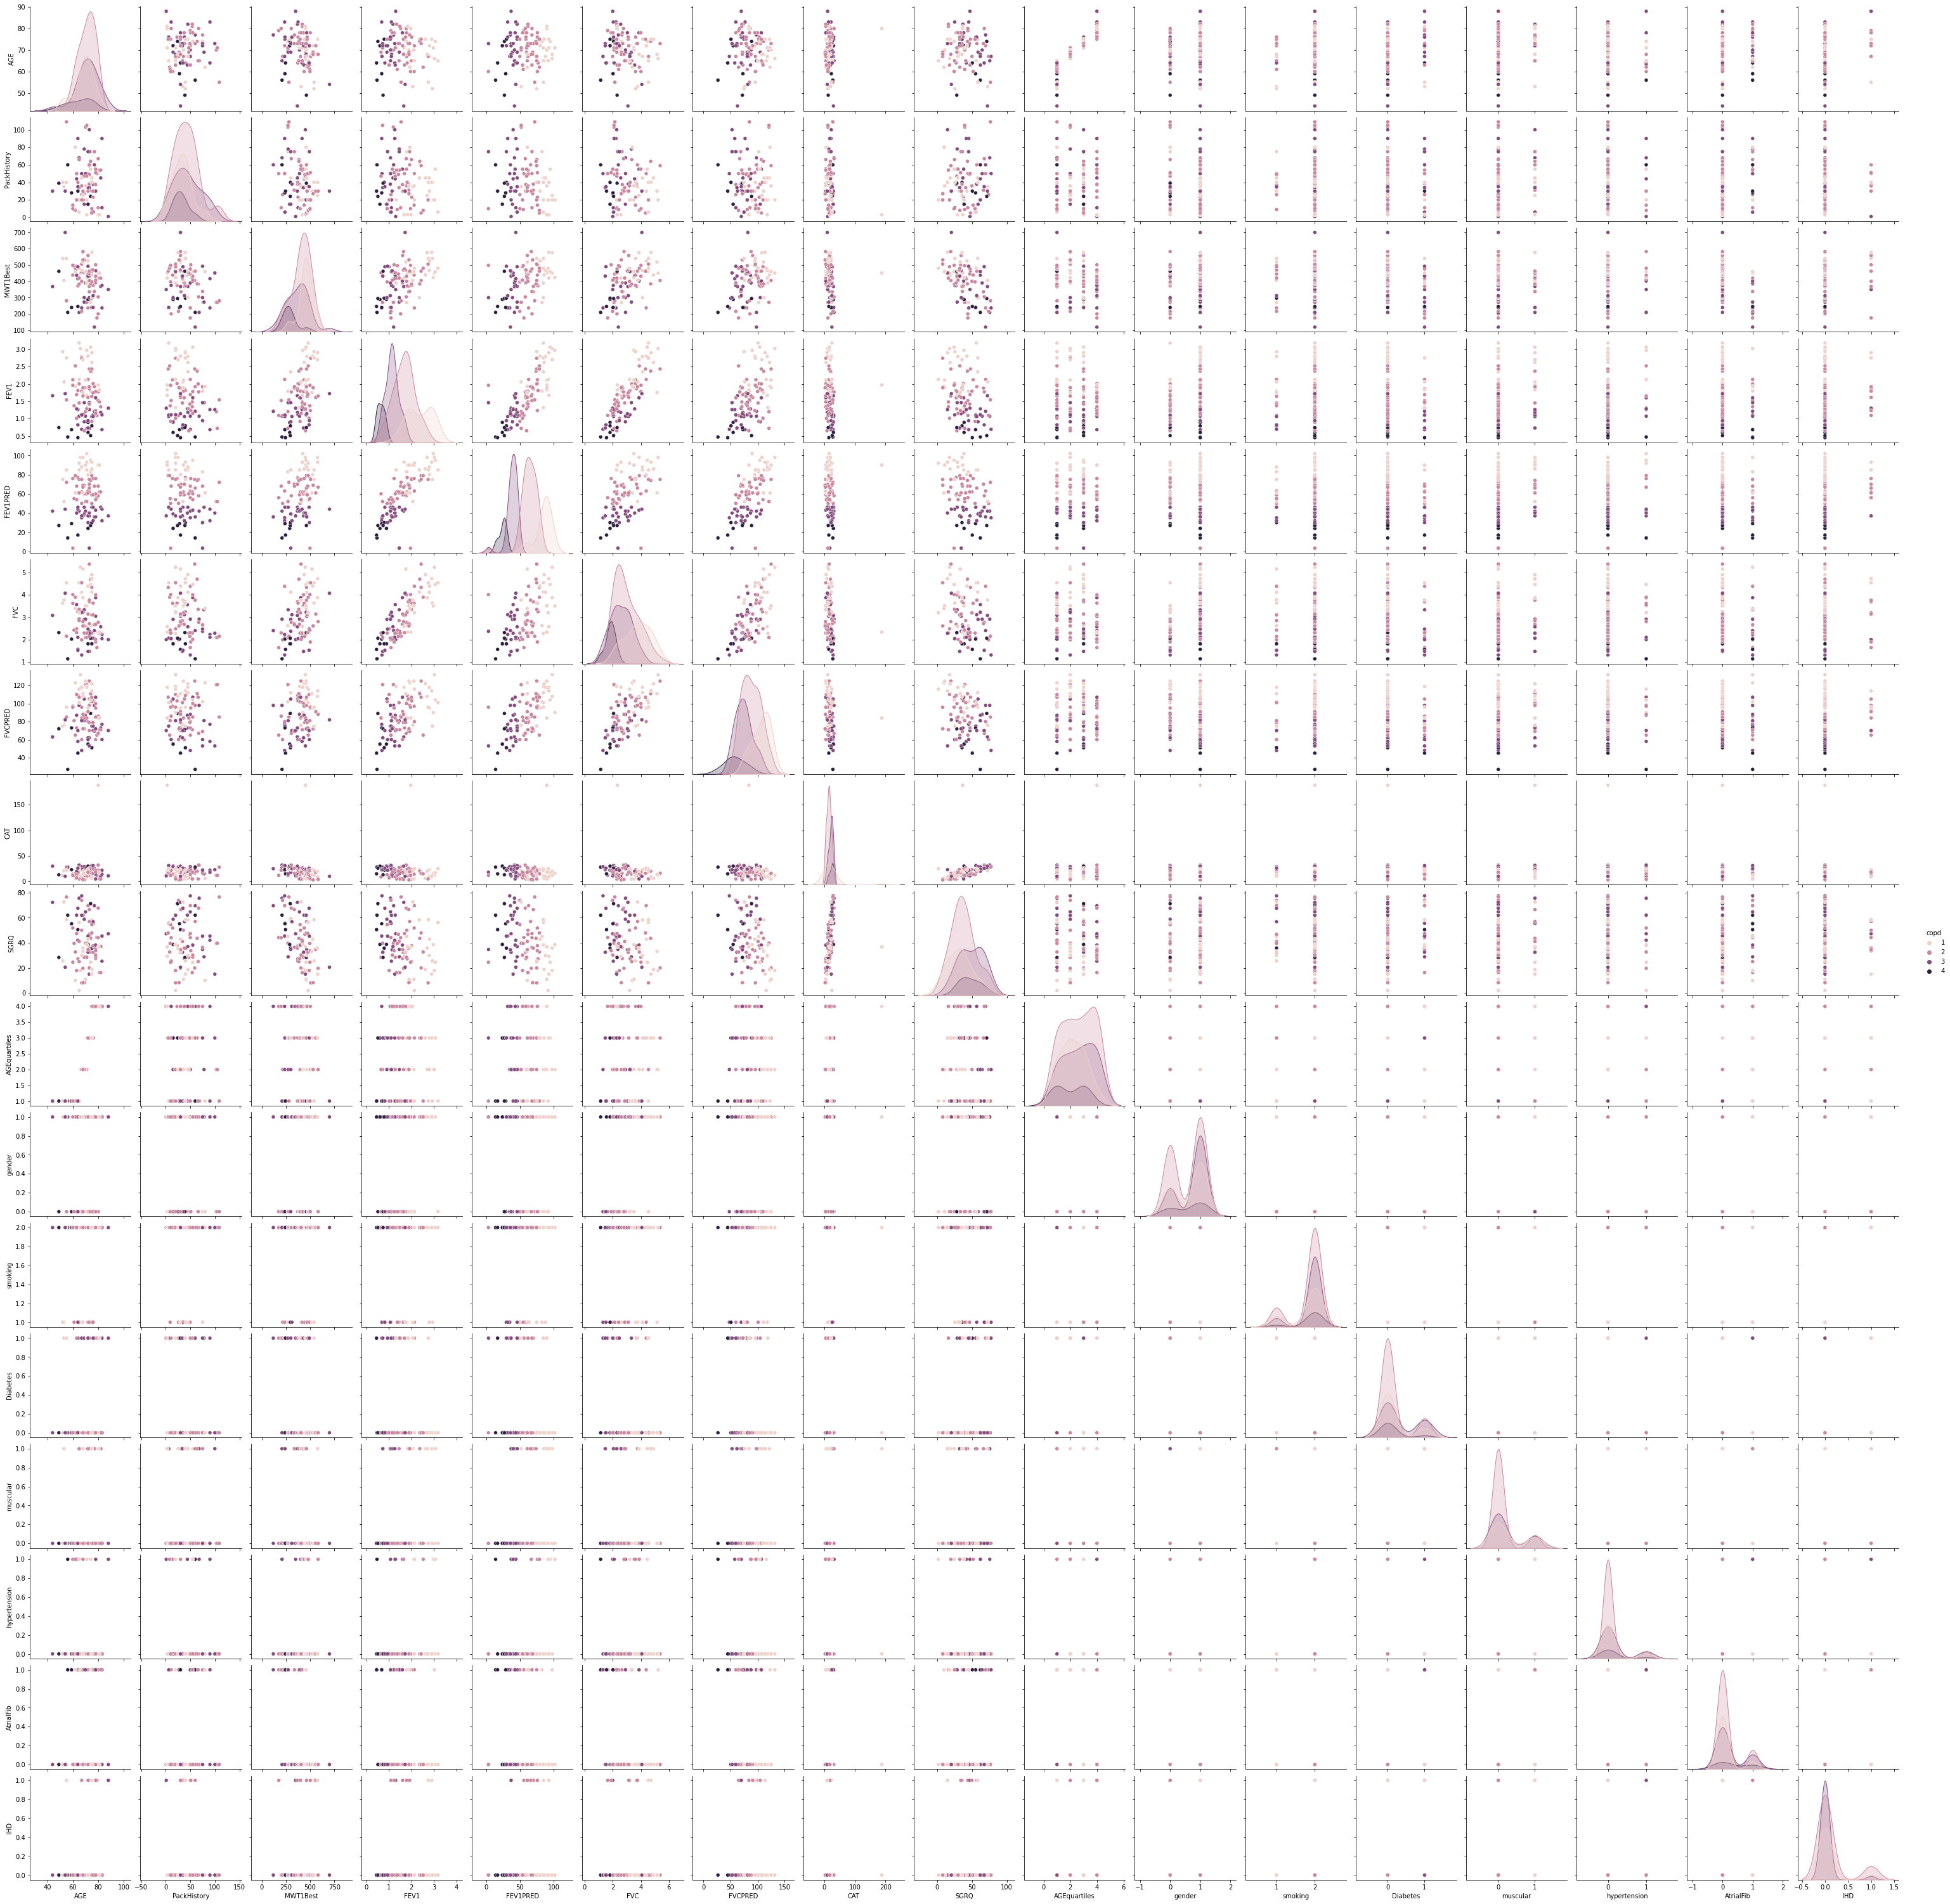

In [90]:
sns.pairplot(data, hue ='copd')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


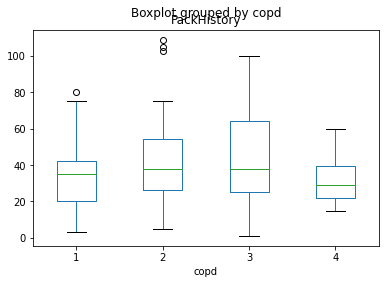

In [91]:
data.boxplot(by ='copd', column =['PackHistory'], grid = False)

#data has some outliers, especially in class 2 and class 1 

In [92]:
#Model split and train

X = data.drop('copd', axis =1)

y = data['copd']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 42)


In [93]:
X_train.shape, y_train.shape

((70, 17), (70,))

In [94]:
X_test.shape, y_test.shape

((31, 17), (31,))

In [95]:

#Scaling of the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [96]:
# model building

from sklearn.metrics import confusion_matrix, classification_report

def fitandprint(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  predict = model.predict(X_test)

  print("Training Accuracy: ", model.score(X_train, y_train))
  print("Testing Accuracy: ", model.score(X_test, y_test))

  print("--------Confusion Matrix----------")
  print(confusion_matrix(y_test, predict))
  print(classification_report(y_test, predict))



In [97]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

fitandprint(logreg, X_train_std, y_train, X_test_std, y_test)


Training Accuracy:  0.9714285714285714
Testing Accuracy:  0.6129032258064516
--------Confusion Matrix----------
[[4 4 0 0]
 [2 7 0 0]
 [0 4 6 1]
 [0 0 1 2]]
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         8
           2       0.47      0.78      0.58         9
           3       0.86      0.55      0.67        11
           4       0.67      0.67      0.67         3

    accuracy                           0.61        31
   macro avg       0.66      0.62      0.62        31
weighted avg       0.68      0.61      0.62        31



In [98]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(class_weight = 'balanced' , n_estimators = 20)

fitandprint(rfc,X_train_std,y_train, X_test_std,y_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8064516129032258
--------Confusion Matrix----------
[[4 4 0 0]
 [0 9 0 0]
 [0 2 9 0]
 [0 0 0 3]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         8
           2       0.60      1.00      0.75         9
           3       1.00      0.82      0.90        11
           4       1.00      1.00      1.00         3

    accuracy                           0.81        31
   macro avg       0.90      0.83      0.83        31
weighted avg       0.88      0.81      0.81        31



In [99]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 20)

fitandprint(gbc, X_train_std, y_train, X_test_std, y_test)


Training Accuracy:  1.0
Testing Accuracy:  0.8709677419354839
--------Confusion Matrix----------
[[ 4  4  0  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         8
           2       0.69      1.00      0.82         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         3

    accuracy                           0.87        31
   macro avg       0.92      0.88      0.87        31
weighted avg       0.91      0.87      0.86        31



In [100]:
#Checking for feature importance using GBC

feature_imp = pd.DataFrame({"Features ": X_train.columns, "Importance": gbc.feature_importances_})
feature_imp.sort_values(by='Importance', ascending = False)

,Features,Importance
4,FEV1PRED,9.518511e-01
3,FEV1,1.792111e-02
5,FVC,1.109974e-02
12,Diabetes,9.639442e-03
1,PackHistory,9.488343e-03
2,MWT1Best,1.752572e-07
7,CAT,5.836194e-08
9,AGEquartiles,5.066093e-08
8,SGRQ,5.438827e-09
15,AtrialFib,0.000000e+00


In [101]:
#AdaBoosting

from sklearn.ensemble import AdaBoostClassifier

adc = AdaBoostClassifier(n_estimators = 20)

fitandprint(adc, X_train_std, y_train, X_test_std, y_test)



Training Accuracy:  0.9285714285714286
Testing Accuracy:  0.7741935483870968
--------Confusion Matrix----------
[[ 4  4  0  0]
 [ 0  9  0  0]
 [ 0  0 11  0]
 [ 0  0  3  0]]
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         8
           2       0.69      1.00      0.82         9
           3       0.79      1.00      0.88        11
           4       0.00      0.00      0.00         3

    accuracy                           0.77        31
   macro avg       0.62      0.62      0.59        31
weighted avg       0.74      0.77      0.72        31



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
##Stacking

from sklearn.ensemble import StackingClassifier

estimators = [('lr', logreg), ('rfc', rfc), ('gbc', gbc), ('adc', adc)]

final = StackingClassifier(estimators = estimators, final_estimator = rfc)

fitandprint(final, X_train_std, y_train, X_test_std, y_test)


Training Accuracy:  1.0
Testing Accuracy:  0.8387096774193549
--------Confusion Matrix----------
[[ 4  4  0  0]
 [ 1  8  0  0]
 [ 0  0 11  0]
 [ 0  0  0  3]]
              precision    recall  f1-score   support

           1       0.80      0.50      0.62         8
           2       0.67      0.89      0.76         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         3

    accuracy                           0.84        31
   macro avg       0.87      0.85      0.84        31
weighted avg       0.85      0.84      0.83        31



The GradientBoostingClassifier gives a better accuracy.  But overall, the stacking model might be the better one.  The Dataset has only 101 data, so the more I train the model, its giving the better accuracy, thats not a good thing.  Maybe we could try to get more samples for this dataset.  We could have tried cross-validation to increase the dataset, but with this much smaller dataset, it might lead to overfit model. 